In [18]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [19]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values

# Split test and train datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [20]:
# Define the model architecture
model = KNeighborsClassifier(n_neighbors=8)

# Train the model
_ = model.fit(X_train, y_train)

Test accuracy: 0.926


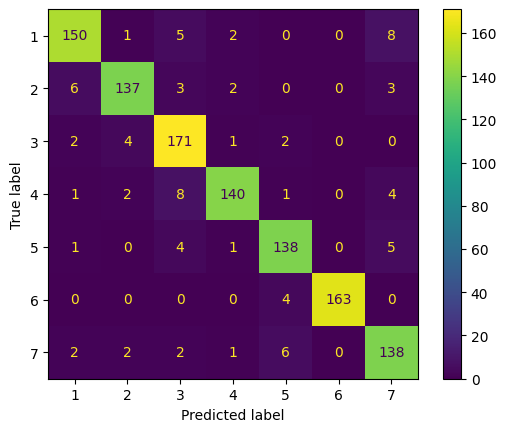

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

# Generating the confusion matrix for the model
conf_mat = np.array(confusion_matrix(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()

In [22]:
accuracies = []

for n_neighbors in range(1, 41):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    _ = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies += [n_neighbors, accuracy],

accuracies = np.array(accuracies)


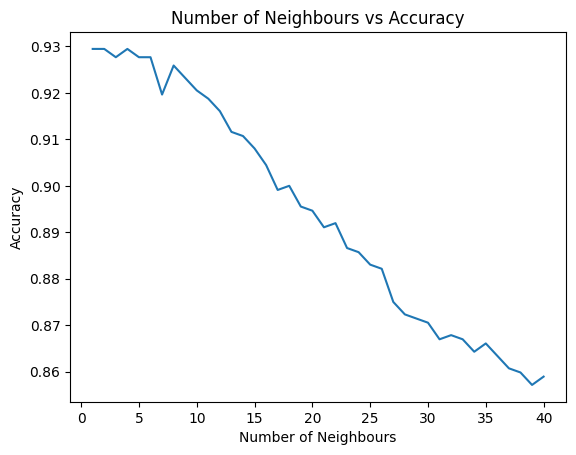

In [23]:
plt.title("Number of Neighbours vs Accuracy")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.plot(*accuracies.T, label="Accuracy")
plt.show()


In [24]:
model_name = "k_nearest_v1"

pickle.dump(model,open(f"models/{model_name}.pickle","wb"))
model = pickle.load(open(f"models/{model_name}.pickle","rb"))